# Clasificación de pepitas (semillas de calabaza)

## El problema

Imagina que trabajas para una empresa que vende botanas, desde papas fritas hasta semillas de calabaza. Tu empresa se especializa en dos tipos de semillas, puesto que los clientes prefieren esos dos tipos: **ürgüp sivrisi** y **çerçevelik**. Sin embargo, estas dos semillas no son producidas por igual, y una es más común y barata para producir (*sivrisi*) que la otra (*cherchevelik*), y en un estudio de mercado se llegó a la conclusión de que tus clientes son capaces de conocer la diferencia entre ambas semillas, o cuando menos notan que las semillas que están consumiendo no son las que pagaron.

Con el mundial a la vuelta de la esquina, y con el fin de tener el inventario suficiente para poder surtir todos los pedidos, tu empresa ha contactado con diversos proveedores para comprarles sus semillas de calabaza.

Sabiendo que tu empresa se precia de altos estándares de calidad, y con la intención de mantener estos estándares aún con semillas adquiridas externamente, **tu tarea es encontrar una forma de verificar que las semillas recibidas son las que tu empresa está pagando y más importante, vendiendo a tus clientes**.

## La solución

El equipo de control de calidad externo utiliza imágenes para extraer diversas medidas de las semillas.

![](https://ik.imagekit.io/thatcsharpguy/projects/codigo-facilito/machine-learning/pepitas-comparacion.png?ik-sdk-version=javascript-1.4.3&updatedAt=1669016137976)

Para facilitarte la tarea, te entregan un archivo CSV en donde cada fila representa una semilla individual y las columnas representan las diversas propiedades de cada una de ellas:

| Atributo            | Columna           | Descripción                                                                                          |
| ------------------- | ----------------- | ---------------------------------------------------------------------------------------------------- |
| Area                | area              | El número de los pixeles que ocupa la semilla                                                        |
| Perimeter           | perimeter         | La circunferencia de la semilla en pixeles                                                           |
| Major Axis Length   | major_axis_length | La mayor distancia en pixeles de la semilla                                                          |
| Minor Axis Length   | minor_axis_length | La menor distancia en pixeles de la semilla                                                          |
| Convex Area         | convex_area       | El número de píxeles de la capa convexa más pequeña en la región formada por la semilla              |
| Equivalent Diameter | equiv_diameter    | La raíz cuadrada de la multiplicación del área de la semilla por cuatro dividida por $π$             |
| Eccentricity        | eccentricity      | La excentricidad de la semilla                                                                       |
| Solidity            | solidity          | La condición convexa y convexa de la semillas                                                        |
| Extent              | extent            | La relación entre el área de la semilla y los píxeles del cuadro delimitador                         |
| Roundness           | roundness         | La ovalidad de la semilla sin considerar las distorsiones de sus bordes                              |
| Aspect Ratio        | aspect_ration     | La relación de aspecto de la semillas                                                                |
| Compactness         | compactness       | La proporción del área de la semilla en relación con el área del círculo con la misma circunferencia |
| Class               | class             | La clase o tipo de semilla a la que pertenece esta observación                                       |

Tu tarea es entonces crear un modelo capaz de clasificar semillas usando la variable objetivo o dependiente **class** y las variables descriptivas o independientes restantes.



### Dataset

Este dataset es una versión modificada de el artículo académico *"The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.)"*:

KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0



## Modelado

In [6]:
import pandas as pd
seeds_dataset = pd.read_csv("seeds.csv")

In [7]:
seeds_dataset.head();

In [18]:
pip install ipywidgets

## Análisis Exploratorio de Datos (EDA)

 Un paso crucial para encontrar las variables más prometedoras a la hora de realizar el modelado. Es recomendable comenzar con un reporte generado automáticamente usando una herramienta como pandas profiling que es este caso como se cambió el nombre del paquete. Para continuar con el uso de datos de perfiles ydata-profilingen en su lugar.

In [9]:
seeds_dataset.describe();

In [10]:
from ydata_profiling import ProfileReport

In [11]:
profile = ProfileReport(seeds_dataset, title="Seed dataset analysis", explorative=True)
profile.to_file("seeds-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Otra buena idea es utilizar una pairplot para ver cómo es que las variables se relacionan entre si

C:\Users\mjhm1\OneDrive\Escritorio\programacion\ciencia_de_datos\ejercicio_semillas_ML\semi_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


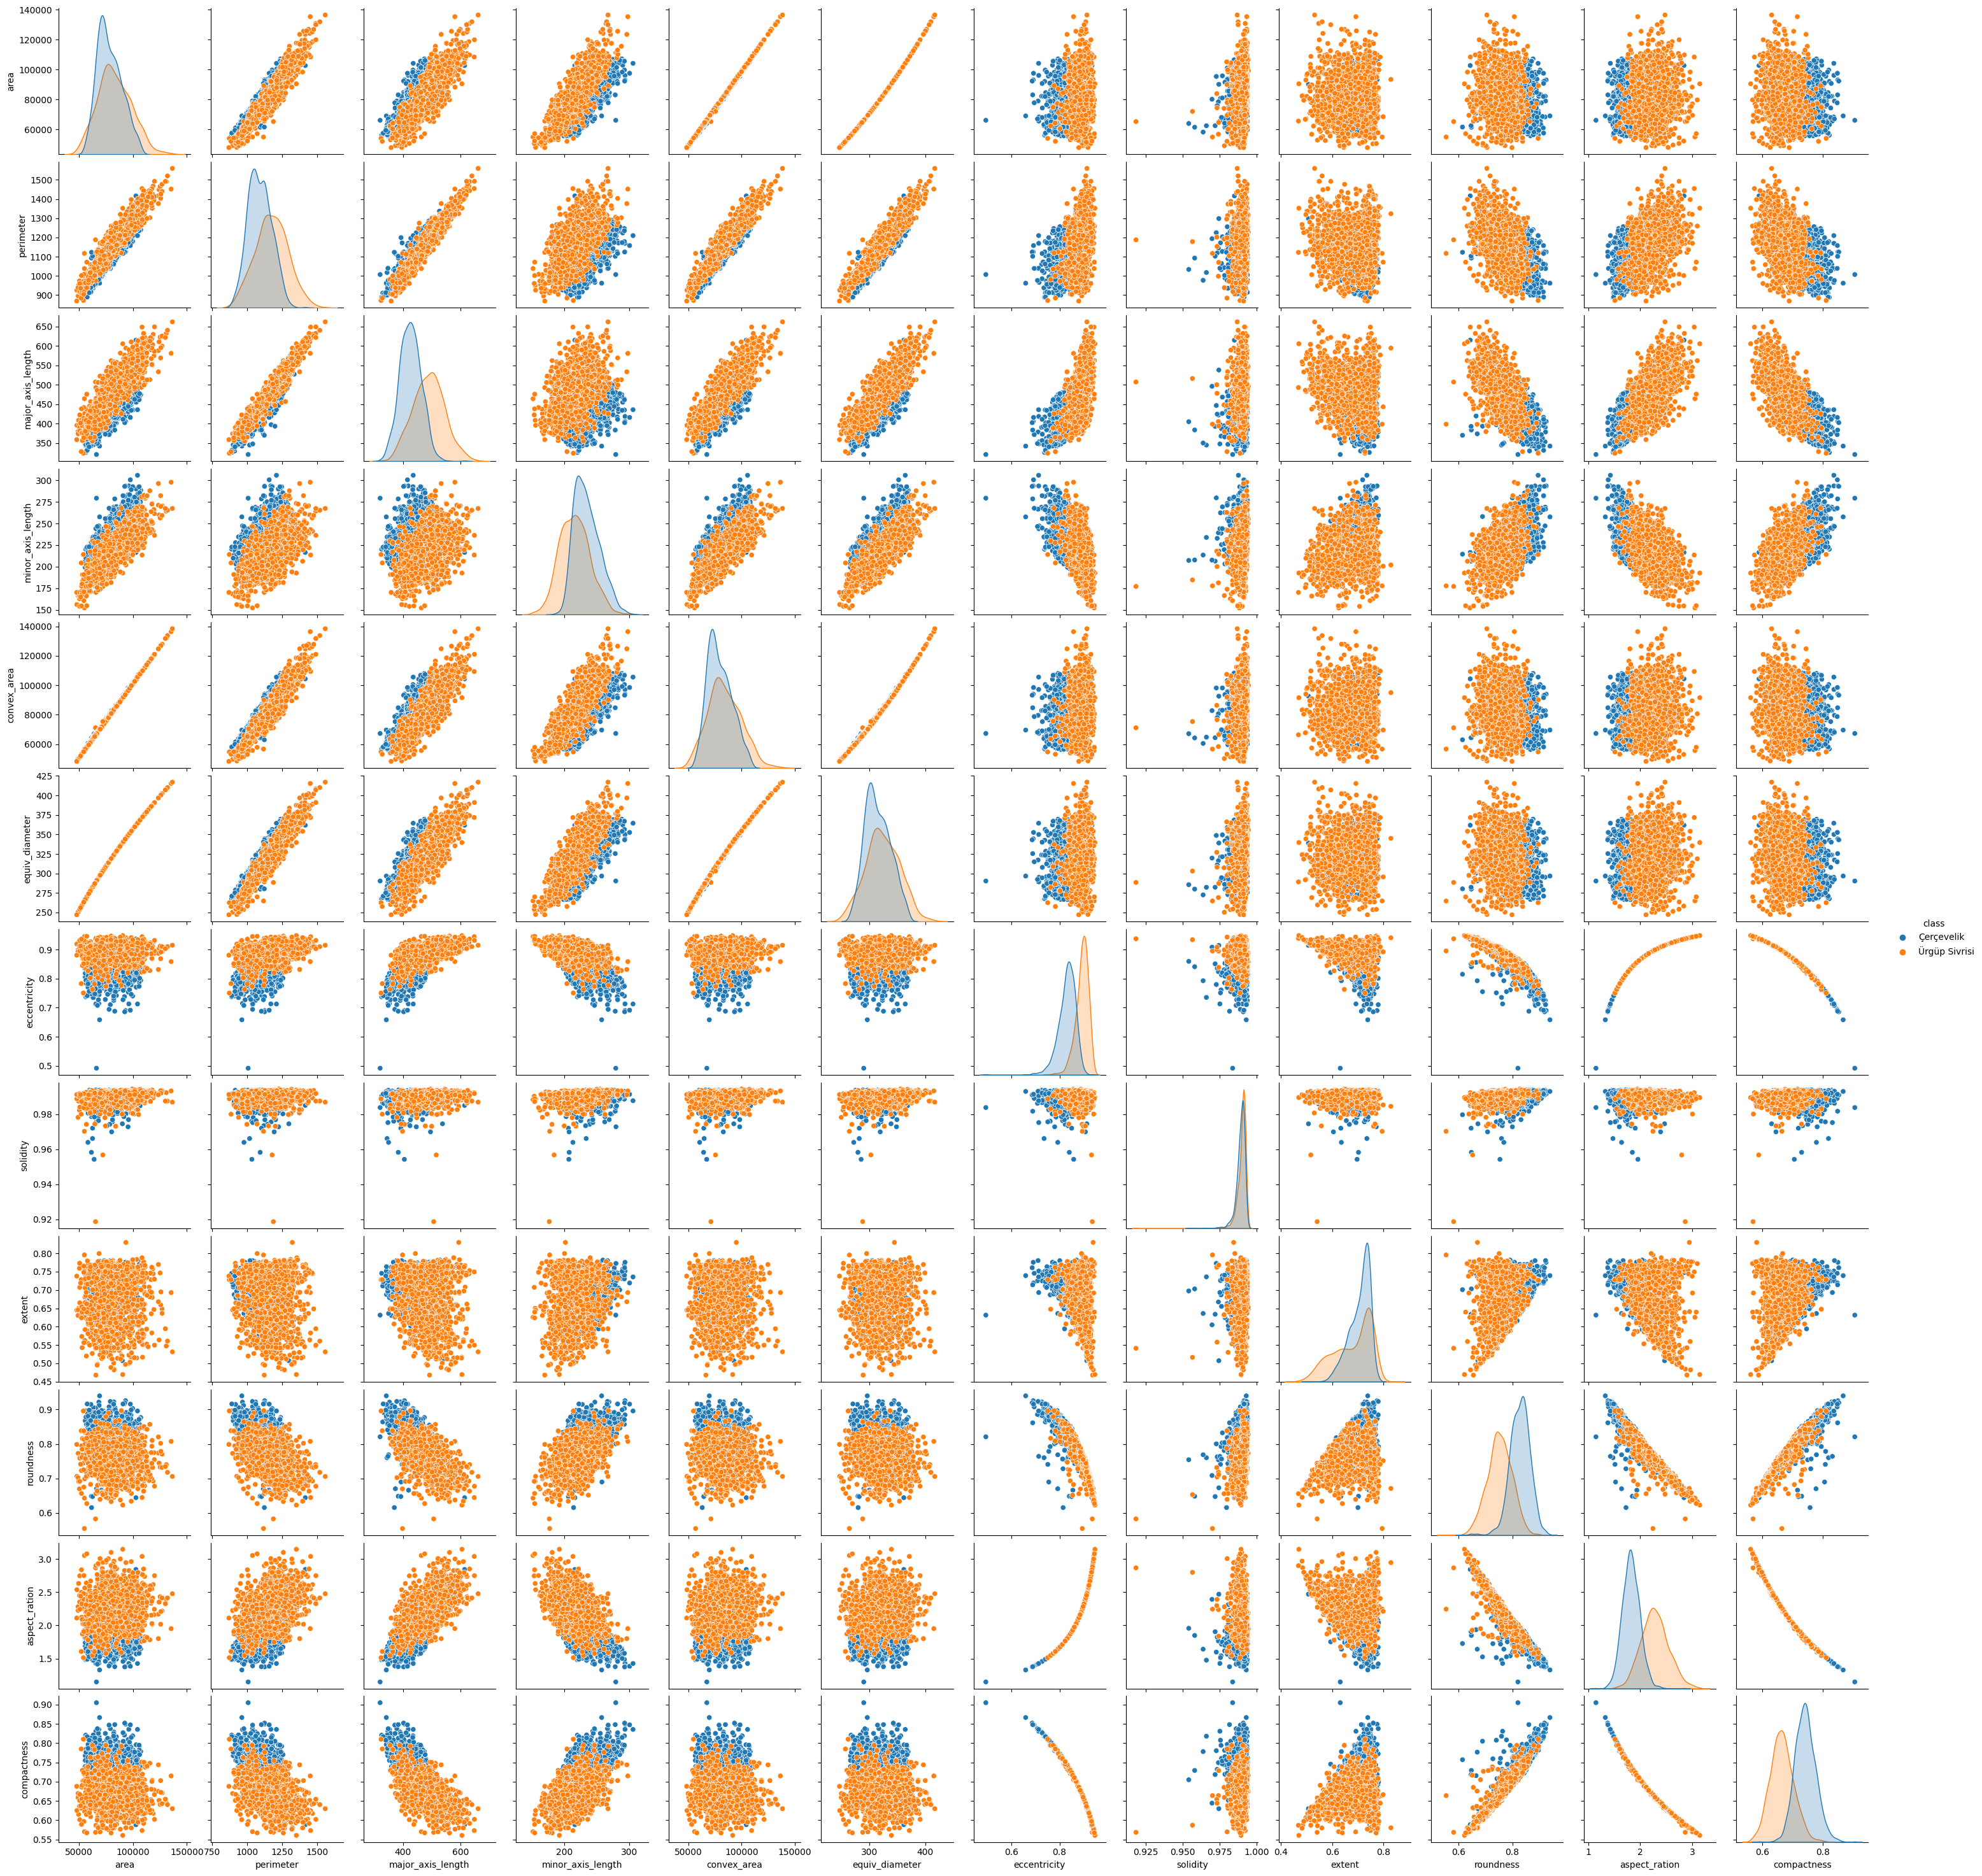

In [12]:
%matplotlib inline

import seaborn as sns
sns.pairplot(data=seeds_dataset, hue='class')

## Descomposicion de componentes principales (PCA) 

Otra forma interesante de visualizar los datos (y tratar de encontrar separabildiad) es utilizando aprendizaje no supervisado a través del análisis de componentes principales

In [19]:
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns

In [14]:
seed_data = seeds_dataset.drop(labels=['area', 'perimeter', 'class'], axis='columns')
seed_data

major_axis_length  minor_axis_length  convex_area  equiv_diameter  \
0              326.1485           220.2388        56831        267.6805   
1              417.1932           234.2289        77280        312.3614   
2              435.8328           211.0457        72663        301.9822   
3              381.5638           222.5322        67118        290.8899   
4              383.8883           220.4545        67117        290.1207   
...                 ...                ...          ...             ...   
2495           533.1513           190.4367        80381        318.4289   
2496           462.9416           191.8210        70216        297.7874   
2497           507.2200           222.1872        88702        334.7199   
2498           501.9065           204.7531        80902        319.1758   
2499           462.8951           234.5597        85781        328.8485   

      eccentricity  solidity  extent  roundness  aspect_ration  compactness  
0           0.7376    0.9902  0.7453     0.8963         1.4809       0.8207  
1           0.8275    0.9916  0.7151     0.8440         1.7811       0.7487  
2           0.8749    0.9857  0.7400     0.7674         2.0651       0.6929  
3           0.8123    0.9902  0.7396     0.8486         1.7146       0.7624  
4           0.8187    0.9850  0.6752     0.8338         1.7413       0.7557  
...            ...       ...     ...        ...            ...          ...  
2495        0.9340    0.9907  0.4888     0.6672         2.7996       0.5973  
2496        0.9101    0.9919  0.6002     0.7444         2.4134       0.6433  
2497        0.8990    0.9920  0.7643     0.7549         2.2828       0.6599  
2498        0.9130    0.9890  0.7374     0.7185         2.4513       0.6359  
2499        0.8621    0.9901  0.7360     0.7933         1.9735       0.7104  

[2500 rows x 10 columns]

In [24]:
seed_types = seeds_dataset[['class']]
pca = PCA(n_components=2)
pca.fit(seed_data)

PCA(n_components=2)

In [26]:
data = pca.transform(seed_data)
reduced_data = pd.DataFrame(data, columns=['x', 'y'])
reduced_data['class'] = seed_types 
reduced_data

x          y          class
0    -24677.420366 -55.861828     Çerçevelik
1     -4228.182400 -29.019901     Çerçevelik
2     -8845.133572   8.928280     Çerçevelik
3    -14390.273736 -31.638275     Çerçevelik
4    -14391.270146 -28.634810     Çerçevelik
...            ...        ...            ...
2495  -1126.871652  86.997882  Ürgüp Sivrisi
2496 -11292.057649  47.567534  Ürgüp Sivrisi
2497   7194.048696  29.890569  Ürgüp Sivrisi
2498   -605.958361  51.392517  Ürgüp Sivrisi
2499   4272.931407  -8.395539  Ürgüp Sivrisi

[2500 rows x 3 columns]

<Axes: xlabel='x', ylabel='y'>

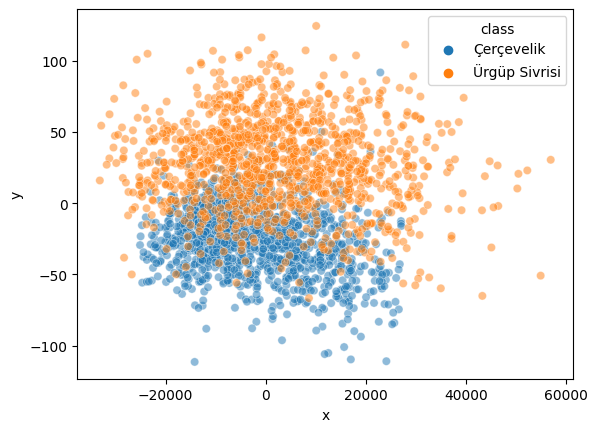

In [27]:
sns.scatterplot(x='x', y='y', hue='class', data=reduced_data, alpha=0.5)

## Feature engineering

#### Eliminando las características co-relacionadas

In [28]:
seeds_dataset_clean = seeds_dataset.drop(labels=['area', 'perimeter'], axis='columns')
seeds_dataset_clean

major_axis_length  minor_axis_length  convex_area  equiv_diameter  \
0              326.1485           220.2388        56831        267.6805   
1              417.1932           234.2289        77280        312.3614   
2              435.8328           211.0457        72663        301.9822   
3              381.5638           222.5322        67118        290.8899   
4              383.8883           220.4545        67117        290.1207   
...                 ...                ...          ...             ...   
2495           533.1513           190.4367        80381        318.4289   
2496           462.9416           191.8210        70216        297.7874   
2497           507.2200           222.1872        88702        334.7199   
2498           501.9065           204.7531        80902        319.1758   
2499           462.8951           234.5597        85781        328.8485   

      eccentricity  solidity  extent  roundness  aspect_ration  compactness  \
0           0.7376    0.9902  0.7453     0.8963         1.4809       0.8207   
1           0.8275    0.9916  0.7151     0.8440         1.7811       0.7487   
2           0.8749    0.9857  0.7400     0.7674         2.0651       0.6929   
3           0.8123    0.9902  0.7396     0.8486         1.7146       0.7624   
4           0.8187    0.9850  0.6752     0.8338         1.7413       0.7557   
...            ...       ...     ...        ...            ...          ...   
2495        0.9340    0.9907  0.4888     0.6672         2.7996       0.5973   
2496        0.9101    0.9919  0.6002     0.7444         2.4134       0.6433   
2497        0.8990    0.9920  0.7643     0.7549         2.2828       0.6599   
2498        0.9130    0.9890  0.7374     0.7185         2.4513       0.6359   
2499        0.8621    0.9901  0.7360     0.7933         1.9735       0.7104   

              class  
0        Çerçevelik  
1        Çerçevelik  
2        Çerçevelik  
3        Çerçevelik  
4        Çerçevelik  
...             ...  
2495  Ürgüp Sivrisi  
2496  Ürgüp Sivrisi  
2497  Ürgüp Sivrisi  
2498  Ürgüp Sivrisi  
2499  Ürgüp Sivrisi  

[2500 rows x 11 columns]

### Split dataset

In [30]:
from sklearn.model_selection import train_test_split

rest, test = train_test_split(seeds_dataset_clean, test_size=0.2, shuffle=True) # 20% of 100 = 20
train, val = train_test_split(rest, test_size=0.25, shuffle=True) # 25% of 80 = 20

distributions = [len(train), len(val), len(test)]

print(distributions)
print([dist/len(reduced_data) for dist in distributions])

[1500, 500, 500]
[0.6, 0.2, 0.2]


## Divide features

In [32]:
train_x = train.drop(labels=['class'], axis='columns')
val_x = val.drop(labels=['class'], axis='columns')
test_x = test.drop(labels=['class'], axis='columns')
train_x

major_axis_length  minor_axis_length  convex_area  equiv_diameter  \
1454           523.4148           207.0624        85274        328.2129   
2169           573.2172           219.4334        99166        353.9767   
46             388.6198           247.8359        76417        310.0108   
936            463.6531           270.2814        98794        352.5079   
1022           433.4101           240.4477        82481        322.3414   
...                 ...                ...          ...             ...   
1146           459.7797           243.7052        88477        333.9240   
656            414.9175           221.8285        72725        303.0050   
338            366.5080           212.3324        61459        277.6455   
2056           606.7535           231.9520       111273        374.3397   
2225           433.4113           200.4310        69034        294.1544   

      eccentricity  solidity  extent  roundness  aspect_ration  compactness  
1454        0.9184    0.9922  0.7652     0.7195         2.5278       0.6271  
2169        0.9238    0.9924  0.7480     0.7020         2.6123       0.6175  
46          0.7703    0.9878  0.7015     0.8590         1.5681       0.7977  
936         0.8125    0.9879  0.6919     0.8285         1.7154       0.7603  
1022        0.8320    0.9894  0.7489     0.8498         1.8025       0.7437  
...            ...       ...     ...        ...            ...          ...  
1146        0.8480    0.9898  0.6403     0.8198         1.8866       0.7263  
656         0.8451    0.9915  0.6819     0.8512         1.8704       0.7303  
338         0.8151    0.9851  0.7305     0.8299         1.7261       0.7575  
2056        0.9240    0.9891  0.6465     0.6992         2.6159       0.6170  
2225        0.8866    0.9844  0.5658     0.7386         2.1624       0.6787  

[1500 rows x 10 columns]

In [40]:
train_y = train[['class']].copy()
val_y = val[['class']].copy()
test_y = test[['class']].copy()


class
820      Çerçevelik
776      Çerçevelik
824      Çerçevelik
87       Çerçevelik
2055  Ürgüp Sivrisi
...             ...
1811  Ürgüp Sivrisi
1492  Ürgüp Sivrisi
435      Çerçevelik
155      Çerçevelik
770      Çerçevelik

[500 rows x 1 columns]

## Escalado de características (feature scaling)

In [41]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
major_axis_length_scaler = MaxAbsScaler()

In [42]:
major_axis_length_scaler.fit(train_x[['major_axis_length']])

MaxAbsScaler()

In [45]:
major_axis_length_frame = train[['major_axis_length']].copy()
major_axis_length_frame['scaled'] = major_axis_length_scaler.transform(train_x[['major_axis_length']])
major_axis_length_frame

major_axis_length    scaled
1454           523.4148  0.790763
2169           573.2172  0.866003
46             388.6198  0.587118
936            463.6531  0.700476
1022           433.4101  0.654786
...                 ...       ...
1146           459.7797  0.694624
656            414.9175  0.626848
338            366.5080  0.553712
2056           606.7535  0.916669
2225           433.4113  0.654788

[1500 rows x 2 columns]

## Aplicando escalado a múltiples features

In [46]:
scaler = MaxAbsScaler()

In [47]:
scaler.fit(train_x)

MaxAbsScaler()

In [48]:
train_x_scaled = scaler.transform(train_x)
val_x_scaled = scaler.transform(val_x)
test_x_scaled = scaler.transform(test_x)

## entrenamiento de modelo-Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression(max_iter=1000)

lr.fit(train_x_scaled, train_y)

C:\Users\mjhm1\OneDrive\Escritorio\programacion\ciencia_de_datos\ejercicio_semillas_ML\semi_env\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

## Verifica el desempeño en el conjunto de entrenamiento

In [53]:
train_pred = lr.predict(train_x_scaled)  # Para diagnosticar overfitting
val_pred = lr.predict(val_x_scaled)  # Para decidir cambios sobre el modelo

In [57]:
train_pred

array(['Ürgüp Sivrisi', 'Ürgüp Sivrisi', 'Çerçevelik', ..., 'Çerçevelik',
       'Ürgüp Sivrisi', 'Ürgüp Sivrisi'], dtype=object)

In [67]:
from sklearn.metrics import accuracy_score

training_accuracy = accuracy_score(train_y, train_pred)
validation_accuracy = accuracy_score(val_y, val_pred)

print(f"Training accuracy:   {training_accuracy:0.2%}")
print(f"Validation accuracy: {validation_accuracy:0.2%}")

Training accuracy:   86.33%
Validation accuracy: 86.40%


## Verifica el desempeño en las pruebas

In [68]:
test_pred = lr.predict(test_x_scaled)
test_accuracy = accuracy_score(test_y, test_pred)

print(f"Test accuracy:   {test_accuracy:0.2%}")

Test accuracy:   87.00%


## Almacena los artefactos

In [69]:
import pickle

In [70]:
with open("scaler.pickle", "wb") as wb:
    pickle.dump(scaler, wb)

In [71]:
with open("model.pickle", "wb") as wb:
    pickle.dump(lr, wb)

## Lee los artefactos del disco

In [72]:
with open("scaler.pickle", "rb") as rb:
    scaler = pickle.load(rb)

In [73]:
with open("model.pickle", "rb") as rb:
    model = pickle.load(rb)

## Simulacion - Prueba con instancia

In [74]:
nueva_pepita = [{
    'major_axis_length': 326.1485,
 'minor_axis_length': 220.2388,
 'convex_area': 56831,
 'equiv_diameter': 267.6805,
 'eccentricity': 0.7376,
 'solidity': 0.9902,
 'extent': 0.7453,
 'roundness': 0.8963,
 'aspect_ration': 1.4809,
 'compactness': 0.8207,
}]

nueva_pepita = pd.DataFrame.from_dict(nueva_pepita)
nueva_pepita

major_axis_length  minor_axis_length  convex_area  equiv_diameter  \
0           326.1485           220.2388        56831        267.6805   

   eccentricity  solidity  extent  roundness  aspect_ration  compactness  
0        0.7376    0.9902  0.7453     0.8963         1.4809       0.8207

In [80]:
instance_x = scaler.transform(nueva_pepita)
instance_x

array([[0.49273747, 0.72016297, 0.41067609, 0.6419152 , 0.77937447,
        0.9958765 , 0.89838476, 0.96844949, 0.47818787, 0.90695104]])

In [81]:
variant = model.predict(instance_x)
variant_proba = model.predict_proba(instance_x)

### Resultado 

In [82]:
variant

array(['Çerçevelik'], dtype=object)